## Compares the projection effect proxy $\sigma_z$ to $\cos(i)$.

In [1]:
import numpy as np
import sys
sys.path.append('/home/zzbenjamin94/Desktop/Astronomy/Research/DES_Galaxy_Cluster')

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from tools.plot_utils import plot_pretty
plot_pretty()

# setup notebook for inline figures
%matplotlib inline

#paths 
from tools.setup.setup import data_home_dir, home_dir
import astropy.io.fits as fits
datadir = data_home_dir()
homedir = home_dir()

## Input files

### Sigma_z vs cos(i) file

In [2]:
myfile = homedir+'output/projection/'+'buzzard-3_1.9.2+1-6a_run_halos_lambda_chisq_MCylinder_halo_sigma_z_cosi.fit'
myfile = fits.open(myfile)
sigmaz_cosi_data = myfile[1].data

#Checking FITS into
#hrun_list.info()
print "Names of columns in hrun_data are: \n"
print sigmaz_cosi_data.names

#Converting FITS files into record array
sigmaz_cosi_data = np.array(sigmaz_cosi_data, dtype=sigmaz_cosi_data.dtype)
sigmaz_cosi_data = sigmaz_cosi_data.view(np.recarray)

print "\nNumber of halos is", len(sigmaz_cosi_data)

Names of columns in hrun_data are: 

['HALOID', 'M200', 'R200', 'MEM_MATCH_ID', 'RA', 'DEC', 'Z', 'Z_COS', 'P_BCG', 'Z_LAMBDA', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E', 'LAMBDA_CHISQ_ZORIG', 'SCALEVAL', 'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'MASKFRAC', 'GEOMASKFRAC', 'R_LAMBDA', 'R_MASK', 'Z_LAMBDA_E', 'NCROSS', 'Z_LAMBDA_NITER', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2', 'C_LAMBDA', 'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'PZBINS', 'PZ', 'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW', 'BCG_SPEC_Z', 'LIM_EXPTIME', 'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD', 'MCylinder_halo', 'sigma_proxy', 'cosi']

Number of halos is 328697


### Cuts

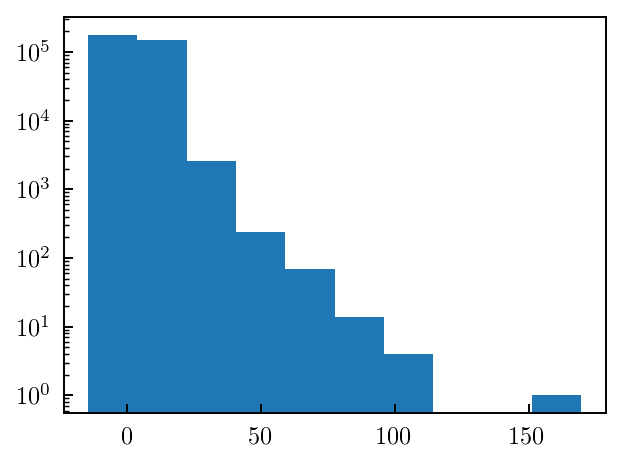

In [3]:
plt.figure(figsize=(4,3))
plt.hist(sigmaz_cosi_data.LAMBDA_CHISQ)
plt.yscale('log')
plt.show()

In [20]:
#Apply mass cut
masscut = 1e13
masscut_ind = np.where(sigmaz_cosi_data.M200 >= masscut)[0]
sigmaz_cosi_data = sigmaz_cosi_data[masscut_ind]
print "After mass cut of {:2g} number of halos is {}".format(masscut, len(sigmaz_cosi_data))

#cos(i) > 0.0 cut
cosi_ind = np.where(sigmaz_cosi_data.cosi >= 0.0)[0]
sigmaz_cosi_data = sigmaz_cosi_data[cosi_ind]
print "After cos(i) cut number of halos is {}".format(len(sigmaz_cosi_data))

#sigma_proxy cut. -1 means invalid
sigmaz_cut_ind =  np.where(sigmaz_cosi_data.sigma_proxy != -1)
sigmaz_cosi_data = sigmaz_cosi_data[sigmaz_cut_ind]
print "After sigma_z != -1 cut number of halos is {}".format(len(sigmaz_cosi_data))

#Nan cut. Remove places where sigma_z is nan. 
sigmaz_nan_cut = np.isnan(sigmaz_cosi_data.sigma_proxy)
sigmaz_nan_cut = np.invert(sigmaz_nan_cut)
sigmaz_cosi_data = sigmaz_cosi_data[sigmaz_nan_cut]
print "After sigma_z != NAN cut number of halos is {}".format(len(sigmaz_cosi_data))

#Apply richnss_cut
#sigmaz_lambda_cut =  np.where(sigmaz_cosi_data.LAMBDA_CHISQ > 20)
#sigmaz_cosi_data = sigmaz_cosi_data[sigmaz_lambda_cut]
#print "After richness > 5 cut number of halos is {}".format(len(sigmaz_cosi_data))

After mass cut of 1e+13 number of halos is 25689
After cos(i) cut number of halos is 25689
After sigma_z != -1 cut number of halos is 25689
After sigma_z != NAN cut number of halos is 25689
After richness > 5 cut number of halos is 3583


## Plotting

In [21]:
##Testing
test = np.isnan(sigmaz_cosi_data.sigma_proxy)
np.where(test == True)

(array([], dtype=int64),)

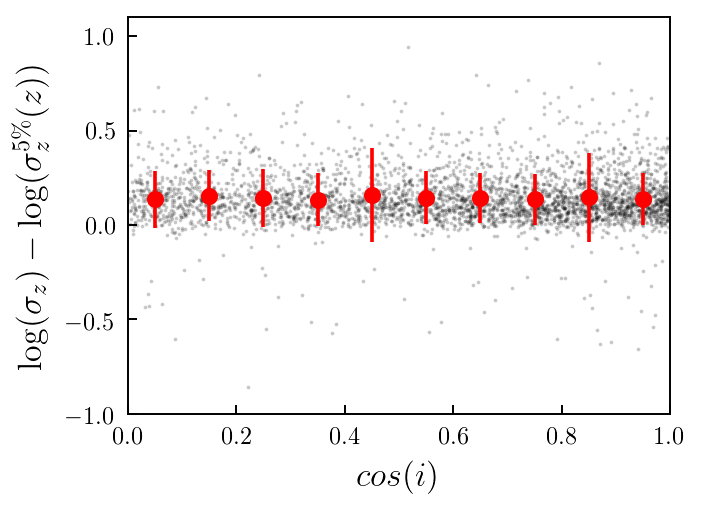

In [22]:
from scipy.stats import binned_statistic as bin_stat
fig, ax = plt.subplots(1,1, figsize = (4,3))
#Error bars
nbins = 10
cosi_range = (0.0,1)
sigmaz_range = (-1,1.1)
n, _ = np.histogram(sigmaz_cosi_data.cosi, bins=nbins, range=cosi_range)
sy, _ = np.histogram(sigmaz_cosi_data.cosi, bins=nbins, weights=sigmaz_cosi_data.sigma_proxy, range=cosi_range)
sy2, cosi_bins = np.histogram(sigmaz_cosi_data.cosi, bins=nbins, weights=sigmaz_cosi_data.sigma_proxy**2., range=cosi_range)
sigmaz_cosi_mean = sy / n
sigmaz_cosi_std = np.sqrt(sy2/n - sigmaz_cosi_mean**2.)

#Error bar plot
ax.errorbar((cosi_bins[1:] + cosi_bins[:-1])/2, sigmaz_cosi_mean, yerr=sigmaz_cosi_std, fmt='ro')

#Scatter plot
ax.scatter(sigmaz_cosi_data.cosi, sigmaz_cosi_data.sigma_proxy, s=0.3, alpha=0.2, color='black')

#Plot features
ax.set_xlim(cosi_range)
ax.set_ylim(sigmaz_range)
ax.set_xlabel(r'$cos(i)$', fontsize=14)lmda_max
ax.set_ylabel(r'$\log(\sigma_z) - \log({\sigma_z^{5\%}(z)})$', fontsize=14)
plt.show()

In [12]:
from scipy.stats import binned_statistic as bin_stat
delta_lambdafrac = np.float64(redM_shape.LAMBDA_CHISQ- hrun_data.LAMBDA_CHISQ )/redM_shape.LAMBDA_CHISQ

nbins = 10
dlmdafrac_range = (-0.4,0.4)
#error for mass
cosi_range = (0.0,1)
n, _ = np.histogram(redM_shape.cosi, bins=nbins, range=cosi_range)
sy, _ = np.histogram(redM_shape.cosi, bins=nbins, weights=delta_lambdafrac, range=cosi_range)
sy2, cosi_bins = np.histogram(redM_shape.cosi, bins=nbins, weights=delta_lambdafrac**2., range=cosi_range)
lmda_cosi_mean = sy / n
lmda_cosi_std = np.sqrt(sy2/n - lmda_cosi_mean**2.)


fig, ax = plt.subplots(1,1, figsize = (4,3))
#plt.tight_layout()
#Scatter plots
ax.scatter(redM_shape.cosi, delta_lambdafrac, s=0.3, alpha=0.2, color='black')
ax.errorbar((cosi_bins[1:] + cosi_bins[:-1])/2, lmda_cosi_mean, yerr=lmda_cosi_std, fmt='ro')
ax.set_xlim(cosi_range)
ax.set_ylim(dlmdafrac_range)

ax.set_ylabel(r'$\frac{\Delta\lambda}{\lambda}$', fontsize=14)
ax.set_xlabel(r'$\cos{(i)}$', fontsize=14)

#Error plots
#For mass of hrun
#dLmda_mass_mean = bin_stat(hrun_data_halocut.M200, delta_lambda, bins=num_bin, range=(5e13,5e14))[0]
#dLmda_mass_stdev = bin_stat(hrun_data_halocut.M200, delta_lambda, bins=num_bin, range=(5e13,5e14))[0]

plt.show()

NameError: name 'redM_shape' is not defined